In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings("ignore")


In [2]:
df1=pd.read_csv("Taiwan Weighted Historical Data (2).csv",index_col="Date",parse_dates=True)

## 資料清理

In [3]:
df1=df1[::-1]

In [4]:

df1=df1[["Price"]]



for i in df1.columns:
    df1[i]=df1[i].str.replace(",","")
    
    
    


In [5]:
df1["Price"]=df1["Price"].astype(float)

In [6]:
df1["Return_rate"]=df1["Price"].pct_change()

In [7]:
df2=pd.read_csv("Philadelphia Semiconductor Index Historical Data.csv",index_col="Date",parse_dates=True)
df2=df2[::-1]
df2=df2[["Price"]]



for i in df2.columns:
    df2[i]=df2[i].str.replace(",","")

df2["Price"]=df2["Price"].astype(float)
df2["Return_rate"]=df2["Price"].pct_change()
    

In [8]:
df = pd.concat([df1, df2], axis=1)

In [9]:
df.columns=[["TW_price","TW_Return_rate","SOX_Price","SOX_Return_rate"]]

In [10]:
# df.to_csv("Data.csv")

In [11]:
df=pd.read_csv("Data.csv",index_col='Date',parse_dates=True)

In [12]:
df.head()

,TW_price,TW_Return_rate,SOX_Price,SOX_Return_rate
Date,,,,
2008-05-01,8619.08,NaN,415.2,NaN
2008-06-01,7523.54,-0.127106,368.2,-0.113198
2008-07-01,7024.06,-0.066389,340.9,-0.074144
2008-08-01,7046.11,0.003139,352.8,0.034908
2008-09-01,5719.28,-0.188307,306.9,-0.130102


## 資料視覺化

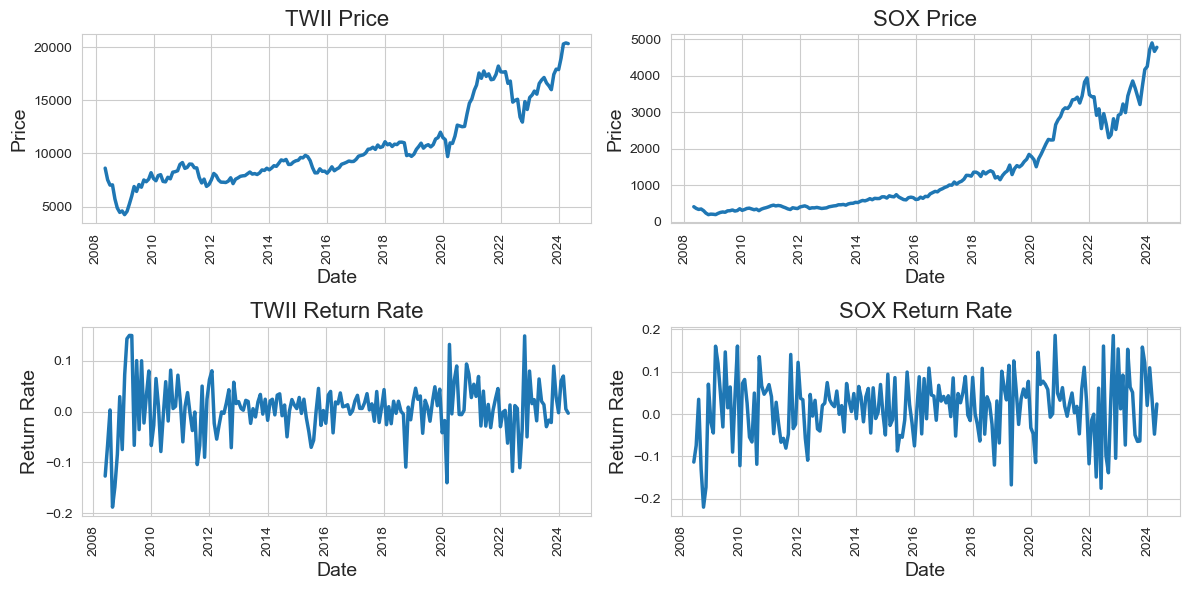

In [13]:
# plt.figure(figsize=(12,6))
# sns.set_style("whitegrid")
# sns.lineplot(data=df,x=df.index,y=df["TW_price"],labels=Tr)
# plt.legend()
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame named df

# Set the style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Plot TWII Price over time
sns.lineplot(data=df["TW_price"], ax=axes[0, 0], palette="tab10", linewidth=2.5)
axes[0, 0].set_title("TWII Price", fontsize=16)
axes[0, 0].set_xlabel("Date", fontsize=14)
axes[0, 0].set_ylabel("Price", fontsize=14)
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot SOX Price over time
sns.lineplot(data=df["SOX_Price"], ax=axes[0, 1], palette="tab10", linewidth=2.5)
axes[0, 1].set_title("SOX Price", fontsize=16)
axes[0, 1].set_xlabel("Date", fontsize=14)
axes[0, 1].set_ylabel("Price", fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot TWII Return Rate over time
sns.lineplot(data=df["TW_Return_rate"], ax=axes[1, 0], palette="tab10", linewidth=2.5)
axes[1, 0].set_title("TWII Return Rate", fontsize=16)
axes[1, 0].set_xlabel("Date", fontsize=14)
axes[1, 0].set_ylabel("Return Rate", fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot SOX Return Rate over time
sns.lineplot(data=df["SOX_Return_rate"], ax=axes[1, 1], palette="tab10", linewidth=2.5)
axes[1, 1].set_title("SOX Return Rate", fontsize=16)
axes[1, 1].set_xlabel("Date", fontsize=14)
axes[1, 1].set_ylabel("Return Rate", fontsize=14)
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
for i, ax in enumerate(axes.flatten()):
    # Adjust the bounding box
    extent = ax.get_tightbbox(fig.canvas.get_renderer()).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f'plot_{i+1}.png', bbox_inches=extent)

# Show the plots
plt.show()





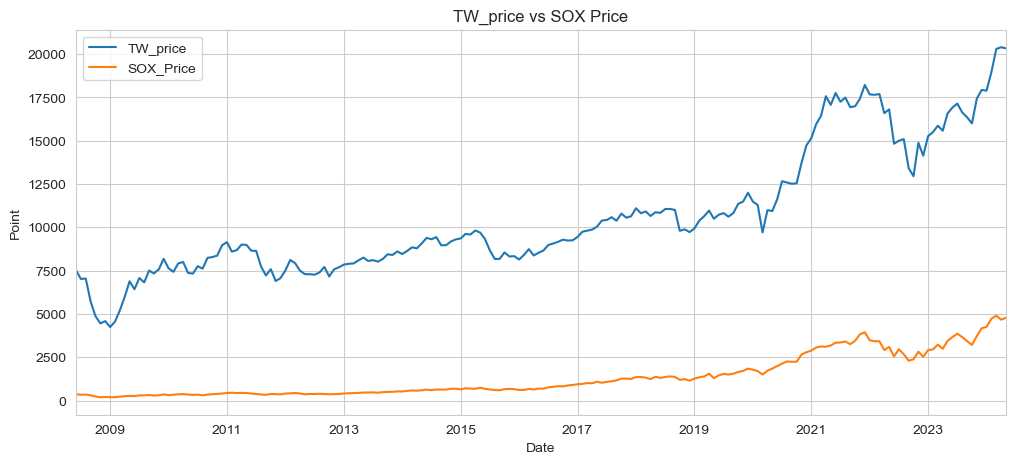

In [118]:
title = 'TW_price vs SOX Price'
ylabel='Point'
xlabel=''

ax = df['TW_price'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['SOX_Price'].plot(legend=True);

In [14]:
df.head()

,TW_price,TW_Return_rate,SOX_Price,SOX_Return_rate
Date,,,,
2008-05-01,8619.08,NaN,415.2,NaN
2008-06-01,7523.54,-0.127106,368.2,-0.113198
2008-07-01,7024.06,-0.066389,340.9,-0.074144
2008-08-01,7046.11,0.003139,352.8,0.034908
2008-09-01,5719.28,-0.188307,306.9,-0.130102


In [15]:
df.head()
df=df.dropna()
df[["SOX_Price","TW_price"]]

,SOX_Price,TW_price
Date,,
2008-06-01,368.2,7523.54
2008-07-01,340.9,7024.06
2008-08-01,352.8,7046.11
2008-09-01,306.9,5719.28
2008-10-01,239.5,4870.66
...,...,...
2024-01-01,4260.9,17889.56
2024-02-01,4726.9,18966.77
2024-03-01,4905.2,20294.45


In [16]:
df.isnull().sum()

TW_price           0
TW_Return_rate     0
SOX_Price          0
SOX_Return_rate    0
dtype: int64

## Granger causality test

In [17]:
#非常好，可以看出TW_PRICE與SOX_PRICE具有因果關係

results=grangercausalitytests(df[["TW_price","SOX_Price"]],maxlag=12,verbose=False)
for lag in results.keys():
    print(f"Lag {lag}:")
    # 只輸出 ssr_chi2test 的結果
    chi2_test_result = results[lag][0]['ssr_chi2test']
    print(f"Chi2 Test Result: {chi2_test_result}")

Lag 1:
Chi2 Test Result: (14.93698592287958, 0.0001111621803475549, 1)
Lag 2:
Chi2 Test Result: (15.313915961046327, 0.00047274332004362194, 2)
Lag 3:
Chi2 Test Result: (19.67077625524355, 0.00019860675489724597, 3)
Lag 4:
Chi2 Test Result: (22.49430027858386, 0.00015975696423733756, 4)
Lag 5:
Chi2 Test Result: (31.807904191513874, 6.484953775789239e-06, 5)
Lag 6:
Chi2 Test Result: (32.45320156422965, 1.335694129811724e-05, 6)
Lag 7:
Chi2 Test Result: (37.91527398107909, 3.1446488284088107e-06, 7)
Lag 8:
Chi2 Test Result: (49.63823183252763, 4.7958772296614976e-08, 8)
Lag 9:
Chi2 Test Result: (56.43277587340707, 6.48820342301415e-09, 9)
Lag 10:
Chi2 Test Result: (57.29302312601179, 1.1742305345091774e-08, 10)
Lag 11:
Chi2 Test Result: (56.91911443699641, 3.443414451937152e-08, 11)
Lag 12:
Chi2 Test Result: (60.8067473438201, 1.6082834749788452e-08, 12)


In [18]:


# 將結果轉換為 DataFrame
results_dict = {
    'Lag': [],
    'Chi2 Test Statistic': [],
    'P-Value': []
}

# 將每個 Lag 的結果添加到字典中
for lag in results.keys():
    chi2_test_result = results[lag][0]['ssr_chi2test']
    results_dict['Lag'].append(lag)
    results_dict['Chi2 Test Statistic'].append(chi2_test_result[0])
    results_dict['P-Value'].append(chi2_test_result[1])
    

# 創建 DataFrame
results_df = pd.DataFrame(results_dict)

# 顯示 DataFrame
results_df.set_index("Lag",inplace=True)

print(results_df)


     Chi2 Test Statistic       P-Value
Lag                                   
1              14.936986  1.111622e-04
2              15.313916  4.727433e-04
3              19.670776  1.986068e-04
4              22.494300  1.597570e-04
5              31.807904  6.484954e-06
6              32.453202  1.335694e-05
7              37.915274  3.144649e-06
8              49.638232  4.795877e-08
9              56.432776  6.488203e-09
10             57.293023  1.174231e-08
11             56.919114  3.443414e-08
12             60.806747  1.608283e-08


## ADF-TEST(檢查資料室否定態)

In [19]:
#檢定數據是否平穩 #DICKEY FULLY TEST

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [20]:
adf_test(df["TW_price"]),adf_test(df["SOX_Price"])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.651686
p-value                   0.988823
# lags used               0.000000
# observations          191.000000
critical value (1%)      -3.465059
critical value (5%)      -2.876794
critical value (10%)     -2.574901
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
Augmented Dickey-Fuller Test: 
ADF test statistic        1.684657
p-value                   0.998091
# lags used              15.000000
# observations          176.000000
critical value (1%)      -3.468062
critical value (5%)      -2.878106
critical value (10%)     -2.575602
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


(None, None)

In [21]:
df_transformed = df.diff()

In [22]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['TW_price'], title='TW_priceDiff')
print()
adf_test(df_transformed['SOX_Price'], title='SOX_PriceDiff')

Augmented Dickey-Fuller Test: TW_priceDiff
ADF test statistic     -1.396122e+01
p-value                 4.516379e-26
# lags used             0.000000e+00
# observations          1.900000e+02
critical value (1%)    -3.465244e+00
critical value (5%)    -2.876875e+00
critical value (10%)   -2.574945e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: SOX_PriceDiff
ADF test statistic       -2.767953
p-value                   0.062999
# lags used              13.000000
# observations          177.000000
critical value (1%)      -3.467845
critical value (5%)      -2.878012
critical value (10%)     -2.575551
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [23]:
df_transformed2 = df_transformed.diff()

In [24]:
df_transformed2 = df_transformed2.dropna()
adf_test(df_transformed2['TW_price'], title='TW_priceSECDiff')
print()
adf_test(df_transformed2['SOX_Price'], title='SOX_PriceSECDiff')


Augmented Dickey-Fuller Test: TW_priceSECDiff
ADF test statistic     -8.263171e+00
p-value                 5.019370e-13
# lags used             6.000000e+00
# observations          1.830000e+02
critical value (1%)    -3.466598e+00
critical value (5%)    -2.877467e+00
critical value (10%)   -2.575260e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: SOX_PriceSECDiff
ADF test statistic       -5.211317
p-value                   0.000008
# lags used              12.000000
# observations          177.000000
critical value (1%)      -3.467845
critical value (5%)      -2.878012
critical value (10%)     -2.575551
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [25]:
df_transformed2.head()

,TW_price,TW_Return_rate,SOX_Price,SOX_Return_rate
Date,,,,
2008-08-01,521.53,0.008811,39.2,0.069998
2008-09-01,-1348.88,-0.260974,-57.8,-0.274062
2008-10-01,478.21,0.231374,-21.5,0.075496
2008-11-01,438.45,0.024238,26.1,0.136686
2008-12-01,540.90,0.049354,55.3,0.195905


# 準備把資料分為訓練集與測試集，這邊我們把測試集用一年的長度也就是12筆資料








In [26]:
df_transformed=df_transformed2[["TW_price","SOX_Price",]]
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [27]:
train

,TW_price,SOX_Price
Date,,
2008-08-01,521.53,39.2
2008-09-01,-1348.88,-57.8
2008-10-01,478.21,-21.5
2008-11-01,438.45,26.1
2008-12-01,540.90,55.3
...,...,...
2023-01-01,1869.37,684.5
2023-02-01,-888.92,-353.3
2023-03-01,125.68,236.0


In [28]:
print(train.shape)
print(test.shape)

(178, 2)
(12, 2)


In [29]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print()

Order = 1
AIC:  22.177493685151266

Order = 2
AIC:  21.93390486547844

Order = 3
AIC:  21.74517526712444

Order = 4
AIC:  21.76363040522663

Order = 5
AIC:  21.752792032162407

Order = 6
AIC:  21.67601845052763

Order = 7
AIC:  21.684321510123343



In [37]:
model.endog_names

['TW_price', 'SOX_Price']

### 看起來aic 6 是最佳方案，那我們使用VAR(6)model

In [38]:
results = model.fit(6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, Jun, 2024
Time:                     02:51:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    22.1518
Nobs:                     172.000    HQIC:                   21.8691
Log likelihood:          -2326.25    FPE:                2.59434e+09
AIC:                      21.6760    Det(Omega_mle):     2.24254e+09
--------------------------------------------------------------------
Results for equation TW_price
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               15.272891        39.666578            0.385           0.700
L1.TW_price         -1.037200         0.106487           -9.740           0.000
L1.SOX_Price         0.679163         0.442870            1.5

In [39]:
df2=results.params
print(df2)

               TW_price  SOX_Price
const         15.272891   4.828644
L1.TW_price   -1.037200  -0.043269
L1.SOX_Price   0.679163  -1.020495
L2.TW_price   -0.655453  -0.009845
L2.SOX_Price   0.461566  -0.870880
L3.TW_price   -0.455244  -0.019705
L3.SOX_Price   0.569883  -0.621479
L4.TW_price   -0.427087  -0.060416
L4.SOX_Price   1.025198  -0.180336
L5.TW_price   -0.486885  -0.098568
L5.SOX_Price   1.086531  -0.010288
L6.TW_price   -0.366103  -0.093723
L6.SOX_Price   1.493186   0.215882


## 預測一年的資料

In [40]:
lag_order = results.k_ar
lag_order

6

In [41]:
z = results.forecast(y=train.values[-lag_order:], steps=12)
z

array([[-850.56031799, -441.8107144 ],
       [ 655.64760366,  217.833599  ],
       [-603.47671407, -186.09435579],
       [ 554.25717135,  221.77597654],
       [-756.62804755, -277.40565437],
       [ 961.42132001,  288.1624121 ],
       [-908.14782236, -243.06455799],
       [ 648.83023687,  192.55631341],
       [-364.40227028, -141.94976578],
       [ 315.36494075,  123.64163594],
       [-393.71202671, -128.24253921],
       [ 448.56050462,  127.54519514]])

In [42]:
test

,TW_price,SOX_Price
Date,,
2023-06-01,-663.20,-238.3
2023-07-01,-106.69,-31.4
2023-08-01,-740.81,-379.2
2023-09-01,230.15,-45.9
2023-10-01,-71.70,18.2
2023-11-01,1785.05,727.1
2023-12-01,-935.62,-57.8
2024-01-01,-538.21,-365.5
2024-02-01,1118.46,380.6


In [44]:
idx = pd.date_range('6/1/2023', periods=12, freq='MS')
df_forecast = pd.DataFrame(z, index=idx, columns=['TW_price2d','SOX_Price2d'])
df_forecast

,TW_price2d,SOX_Price2d
2023-06-01,-850.560318,-441.810714
2023-07-01,655.647604,217.833599
2023-08-01,-603.476714,-186.094356
2023-09-01,554.257171,221.775977
2023-10-01,-756.628048,-277.405654
2023-11-01,961.421320,288.162412
2023-12-01,-908.147822,-243.064558
2024-01-01,648.830237,192.556313
2024-02-01,-364.402270,-141.949766
2024-03-01,315.364941,123.641636


## 預測的結果是二階差分，我們要把他轉回原本的方式，這邊參考別人的coding我不會哈哈

In [45]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['TW_price1d'] = (df['TW_price'].iloc[-nobs-1]-df['TW_price'].iloc[-nobs-2]) + df_forecast['TW_price2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['TW_priceForecast'] = df['TW_price'].iloc[-nobs-1] + df_forecast['TW_price1d'].cumsum()

In [46]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['SOX_Price1d'] = (df['SOX_Price'].iloc[-nobs-1]-df['SOX_Price'].iloc[-nobs-2]) + df_forecast['SOX_Price2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SOX_PriceForecast'] = df['SOX_Price'].iloc[-nobs-1] + df_forecast['SOX_Price1d'].cumsum()

In [47]:
df_forecast

,TW_price2d,SOX_Price2d,TW_price1d,TW_priceForecast,SOX_Price1d,SOX_PriceForecast
2023-06-01,-850.560318,-441.810714,149.219682,16728.179682,16.389286,3469.589286
2023-07-01,655.647604,217.833599,804.867286,17533.046968,234.222885,3703.812170
2023-08-01,-603.476714,-186.094356,201.390572,17734.437539,48.128529,3751.940699
2023-09-01,554.257171,221.775977,755.647743,18490.085282,269.904505,4021.845204
2023-10-01,-756.628048,-277.405654,-0.980305,18489.104978,-7.501149,4014.344055
2023-11-01,961.421320,288.162412,960.441015,19449.545993,280.661263,4295.005318
2023-12-01,-908.147822,-243.064558,52.293193,19501.839186,37.596705,4332.602024
2024-01-01,648.830237,192.556313,701.123430,20202.962616,230.153019,4562.755042
2024-02-01,-364.402270,-141.949766,336.721160,20539.683776,88.203253,4650.958295
2024-03-01,315.364941,123.641636,652.086100,21191.769876,211.844889,4862.803183


In [53]:
df_1=df_forecast[["TW_priceForecast","SOX_PriceForecast"]]
df_2=df[["TW_price","SOX_Price"]]

In [56]:
df_forecast1=df_1.join(df_2)
df_forecast1=df_forecast1[["TW_price","TW_priceForecast","SOX_Price","SOX_PriceForecast"]]

In [57]:
print(df_forecast1)

            TW_price  TW_priceForecast  SOX_Price  SOX_PriceForecast
2023-06-01  16915.54      16728.179682     3673.1        3469.589286
2023-07-01  17145.43      17533.046968     3861.6        3703.812170
2023-08-01  16634.51      17734.437539     3670.9        3751.940699
2023-09-01  16353.74      18490.085282     3434.3        4021.845204
2023-10-01  16001.27      18489.104978     3215.9        4014.344055
2023-11-01  17433.85      19449.545993     3724.6        4295.005318
2023-12-01  17930.81      19501.839186     4175.5        4332.602024
2024-01-01  17889.56      20202.962616     4260.9        4562.755042
2024-02-01  18966.77      20539.683776     4726.9        4650.958295
2024-03-01  20294.45      21191.769876     4905.2        4862.803183
2024-04-01  20396.60      21450.143950     4673.3        4946.405533
2024-05-01  20330.32      22157.078528     4784.9        5157.553077


## 預測視覺化

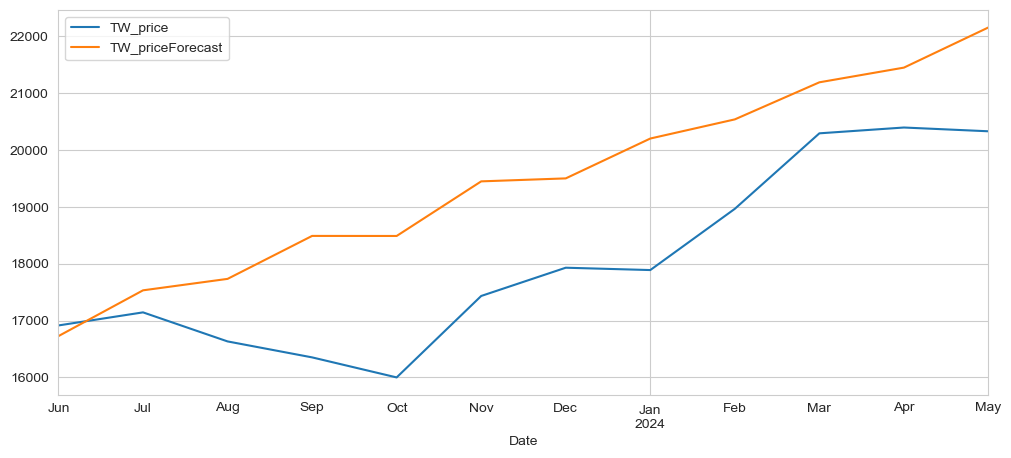

In [58]:
df['TW_price'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['TW_priceForecast'].plot(legend=True);

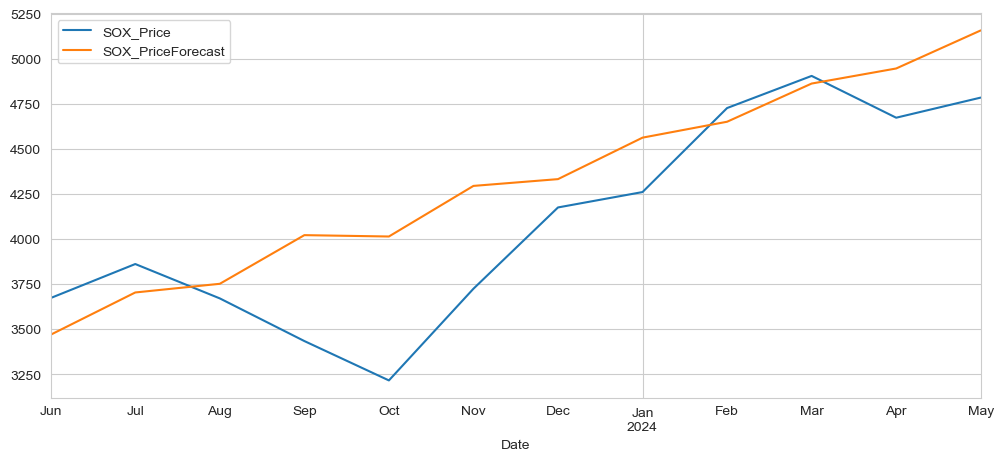

In [59]:
df['SOX_Price'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SOX_PriceForecast'].plot(legend=True);

## 模型評估(Evaluate the model)

In [60]:
RMSE1 = rmse(df_forecast1['TW_price'][-nobs:], df_forecast1['TW_priceForecast'])
print(f'TW_price VAR(6) RMSE: {RMSE1:.3f}')

TW_price VAR(6) RMSE: 1626.800


In [62]:
RMSE2 = rmse(df_forecast1['SOX_Price'][-nobs:], df_forecast1['SOX_PriceForecast'])
print(f'SOX_price VAR(6) RMSE: {RMSE2:.3f}')

SOX_price VAR(6) RMSE: 378.350


## 原則上這邊就可以結束了，但我參考的論文有拿AR Model 做比較 所以我也做一下

In [65]:
from statsmodels.tsa.ar_model import AutoReg

## 我們用AR(6)model比較

In [69]:
model= AutoReg(train['TW_price'],lags=6)
AR6fit1 = model.fit()

In [70]:
start=len(train)
end=len(train)+len(test)-1
z1 = pd.DataFrame(AR6fit1.predict(start=start, end=end, dynamic=False),columns=['TW_price'])

In [72]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['TW_price1d'] = (df['TW_price'].iloc[-nobs-1]-df['TW_price'].iloc[-nobs-2]) + z1['TW_price'].cumsum()

# Now build the forecast values from the first difference set
z1['TW_priceForecast'] = df['TW_price'].iloc[-nobs-1] + z1['TW_price1d'].cumsum()

In [75]:
z1=z1[["TW_priceForecast"]]

In [80]:
ar_df=z1[["TW_priceForecast"]].join(df)

In [83]:
ar_df=ar_df[["TW_price","TW_priceForecast"]]
print(ar_df)

            TW_price  TW_priceForecast
2023-06-01  16915.54      16793.553553
2023-07-01  17145.43      17181.271936
2023-08-01  16634.51      17691.224571
2023-09-01  16353.74      18107.743936
2023-10-01  16001.27      18412.411498
2023-11-01  17433.85      18858.192904
2023-12-01  17930.81      19312.561593
2024-01-01  17889.56      19694.233028
2024-02-01  18966.77      20143.370126
2024-03-01  20294.45      20592.855554
2024-04-01  20396.60      21013.792853
2024-05-01  20330.32      21449.698305


In [84]:
model= AutoReg(train['SOX_Price'],lags=6)
AR6fit1 = model.fit()

In [86]:
start=len(train)
end=len(train)+len(test)-1
z2 = pd.DataFrame(AR6fit1.predict(start=start, end=end, dynamic=False),columns=['SOX_Price'])

In [88]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['SOX_Price1d'] = (df['SOX_Price'].iloc[-nobs-1]-df['SOX_Price'].iloc[-nobs-2]) + z2['SOX_Price'].cumsum()

# Now build the forecast values from the first difference set
z2['SOX_PriceForecast'] = df['SOX_Price'].iloc[-nobs-1] + z2['SOX_Price1d'].cumsum()

In [92]:
z2=z2[["SOX_PriceForecast"]]

In [94]:
ar_df2=z2[["SOX_PriceForecast"]].join(df)

In [96]:
ar_df2=ar_df2[["SOX_Price","SOX_PriceForecast"]]
print(ar_df2)

            SOX_Price  SOX_PriceForecast
2023-06-01     3673.1        3413.851790
2023-07-01     3861.6        3630.553665
2023-08-01     3670.9        3671.070884
2023-09-01     3434.3        3901.375163
2023-10-01     3215.9        3925.490505
2023-11-01     3724.6        4140.448835
2023-12-01     4175.5        4219.024783
2024-01-01     4260.9        4390.316924
2024-02-01     4726.9        4485.147883
2024-03-01     4905.2        4656.896120
2024-04-01     4673.3        4759.524028
2024-05-01     4784.9        4920.183971


In [97]:
ar_df=ar_df.join(ar_df2)
ar_df

,TW_price,TW_priceForecast,SOX_Price,SOX_PriceForecast
2023-06-01,16915.54,16793.553553,3673.1,3413.851790
2023-07-01,17145.43,17181.271936,3861.6,3630.553665
2023-08-01,16634.51,17691.224571,3670.9,3671.070884
2023-09-01,16353.74,18107.743936,3434.3,3901.375163
2023-10-01,16001.27,18412.411498,3215.9,3925.490505
2023-11-01,17433.85,18858.192904,3724.6,4140.448835
2023-12-01,17930.81,19312.561593,4175.5,4219.024783
2024-01-01,17889.56,19694.233028,4260.9,4390.316924
2024-02-01,18966.77,20143.370126,4726.9,4485.147883
2024-03-01,20294.45,20592.855554,4905.2,4656.896120


In [102]:
RMSE3 = rmse(ar_df['TW_price'][-nobs:], ar_df['TW_priceForecast'])
print(f'TW_price AR(6) RMSE: {RMSE3:.3f}')

TW_price AR(6) RMSE: 1301.446


In [101]:
RMSE4 = rmse(ar_df['SOX_Price'][-nobs:], ar_df['SOX_PriceForecast'])
print(f'SOX_Price AR(6) RMSE: {RMSE4:.3f}')

SOX_Price AR(6) RMSE: 313.539


In [112]:
round(RMSE1,4)

1626.7996

In [117]:
pd.DataFrame({"TW_price VAR(6) RMSE":[round(RMSE1,4)],"SOX_price VAR(6) RMSE":[round(RMSE2,4)],"TW_price AR(6) RMSE":[round(RMSE3,4)],"SOX_price AR(6) RMSE":[round(RMSE4,4)]})

,TW_price VAR(6) RMSE,SOX_price VAR(6) RMSE,TW_price AR(6) RMSE,SOX_price AR(6) RMSE
0,1626.7996,378.35,1301.4462,313.5388


## 結論，我們可以發現AR model 在預測上的表現比VAR更加優秀，這可能顯示雖一國股市雖會因其他兩國股市波動而影響，但以自身過去實際發生的觀察值預測未來績效更好。各國對自身所解釋的比例最大。